# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

Q. Does the Smartcab move at all during the simulation?  
A. No, it doesn't move at all  

Q. What kind of rewards is the driving agent receiving?  
A.
* The agent receive a small positive reward when agent take no action at the red light. This positive reward is incentive for contributing safty.  
* The agent receive a negative reward when agent take no action at the green light with no oncoming traffic. This negative reward is penalty for violating reliability.   

Q. How does the light changing color affect the rewards?  
A.
* When the light change from green to red, the rewards change negative to positive because the agent is idled.
* When the light change from red to green, the rewards change positive to negative because the agent is idled.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Q. In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.  
* enforce_deadline
  * This flag sets timeout. If this flag is enabled, the agent have to arrive within 25 steps.
* learning
  * This flag does not change anything yet. Students implement the agent which takes tandom actions at the disabled flag and takes learned actions at the enabled flag in LearningAgent.choose_action()
* num_dummies and grid_size
  * The num_dummies changes number of dummy agent on traffic.
  * The grid_size changes size of clumns and rows in grid. If (2, 3) is set, number of the intersections at columns become 2, and number of the intersections at rows become 2.

Q. In the environment.py Python file, what Environment class function is called when an agent performs an action?  
A. Environment.act(self, agent, action)

Q. In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?  
* The render_text function outputs agent status, action, and rewards to a console. 
* The render function display GUI which show not only agent status, actions, and rewards but also grid, agent, signals, and dummy agents.

Q. In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?  
A. No, this function check whether the agent move or not. When the distination is at current location, this function return None. Then, East-West direction is checked. At last, North-South direction is checked.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


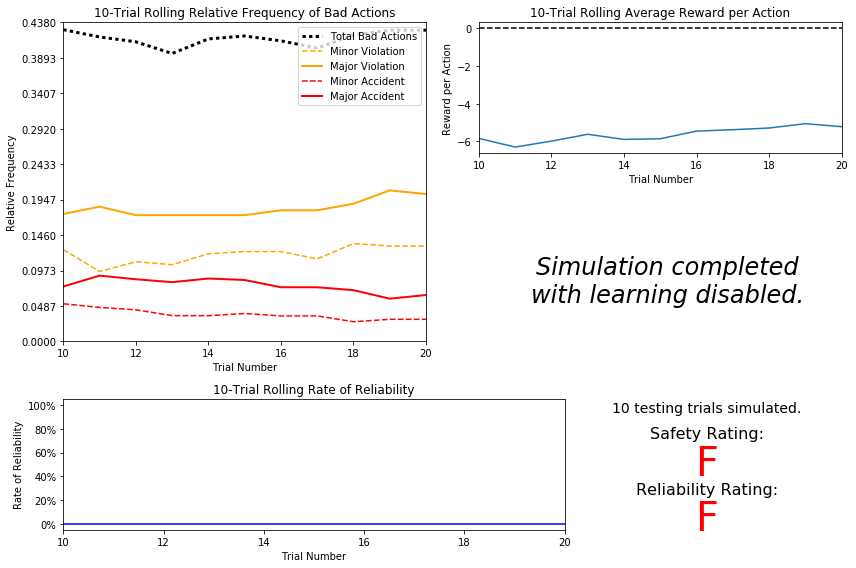

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast

# Load the 'sim_no-learning' log file from the initial simulation results
data = pd.read_csv(os.path.join("logs", 'sim_no-learning.csv'))
training_data = data[data['testing'] == False]

# Extract minor traffic violation causing an accident
minor_accident_num = training_data['actions'].apply(lambda x: ast.literal_eval(x)[3]).sum()
# Extract major traffic violation causing an accident
major_accident_num = training_data['actions'].apply(lambda x: ast.literal_eval(x)[4]).sum()
# Calculate total vioration num which cause accident by summation minor and major violation num 
accident_num = minor_accident_num + major_accident_num
print("The number of total violation which cause accidents = {}".format(accident_num) )

The number of total violation which cause accidents = 51


Q. How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?  
A.
* According to the graph "10-Trial Rolling Relative Frequency of Bad Actions", The frequency making bad decisions is about from 38% to 43%.
* According to Environment.act() method's comment in environment.py, '3' and '4' is the index which designate accsident. Therefore, the number of total decisions which cause accidents are 51 in training period.(The calculation is showing above.)

Q. Given that the agent is driving randomly, does the rate of reliability make sense?  
A.
* According to the graph "10-Trial Rolling Rate of Reliability", the rate of reliability has never improved. In four actions(stop, left, right, and forward), continuously selecting appropriate actions seems to be probabilistically rare. Therefore, I think this result makes sense.

Q. What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?  
A.  
Actions column in sim_no-learning.csv shows the agent received every kind of rewords in almost trials. And the very reward values are under 10. The major accident penalty is so heavy. Therefore, I think this suggests that the agent received heavy penalies.

Q. As the number of trials increases, does the outcome of results change significantly?  
A.  
According to the graph "10-Trial Rolling Average Reward per Action", the reward imporoved slightly. However the change is not significantly.

Q. Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?  
A.  
The safety and reliability of rating in "10 testing trials simulated." are both F. This Smartcab is neither safe nor reliable. This is because this Smartcab caused accidents frequently. Moreover, This Smartcab could have never arrived nor closed at destination in time.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of tates can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

* safety
  * All inputs data is the important for safety. This is because these are relative to traffic rule. And traffic rule violation causes accidents. The light sensor is used for deciding whether the agent shold stop or not. The left, right, and oncoming sensors are used for escaping from crash. Therefore, I think that these features are the most important for safety.
  * Waypoint is related to safety because if the next waypoint is left, the agent has to pay attention to the present of the vehicle oncomming. And, if the next waypoint is right, the agent has to pay attention to the present of the vehicle on the left.
  * ** Deadline is not related to safty** because these features are not related to traffic rules.
* efficiency(reliability)
  * I think waypoint is the most important feature for efficiency. Waypoint is used for deciding whether the agent close to the destination or not. Deadline is used for deciding whether the agent could arrived to the destination untile deadline or not. However, I think ** deadline is not the most important feature for efficiency**. We can know whether the agent can arrive at the destination in time before the agent starts if the agent can take the base action for closing the destination.
  * On the other hand, input sensors are not related to efficiency because these features are not related to distance to the destination.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* The number of state for learning at one step is 5 
  * light:{green, red}
  * left_vehicle:{left, right, forward, none}
  * right_vehicle:{left, right, forward, none}
  * oncomming_vehicle:{left, right, forward, none}
  * waypoint:{left, right, forward}
* The total number of states is 384(=2 \* 4^3 \* 3).
* There are 4 actions(left, right, forward, stop) in each state.
* The total number of combinations of actions and states (**state space**) is 1,536(=384*4).
* In the default grid size (8,6), the maximum step is 14(=8+6, Manhattan distance between the top left and the bottom right) when the agent takes the best actions.
* If the number of training trials is 110, the total number of steps is 1549(=14*110). If the agent has so much luck, the agent could learn all state within 110 trials.
* I think that the agent needs more than 10 times of the ideal case(1100 trials). And 1100 trials are reasonable enough for learning.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

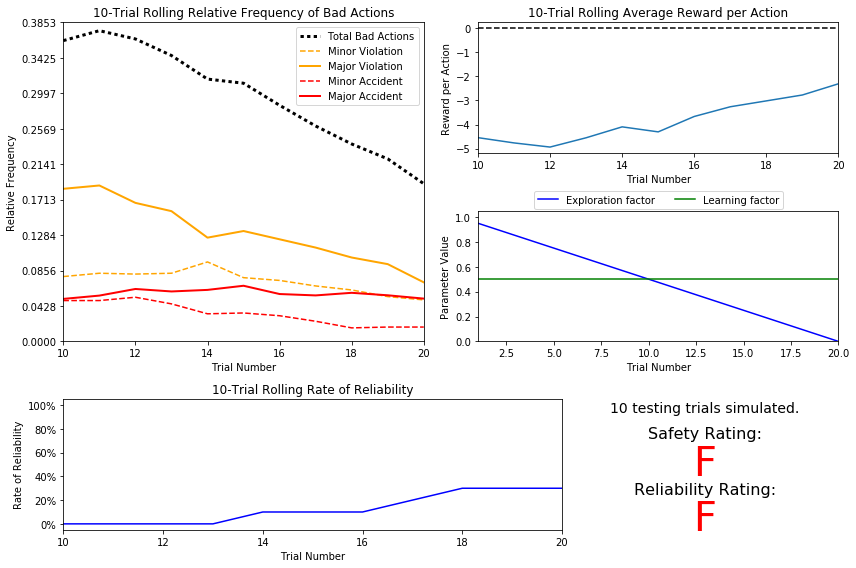

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Q. Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?  
A. Safety and reliability rating is same, F. The transition of major accidents frequencies are similar to the basic driving agent's. This frequency does improved.

Q. Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?  
A. The number of training trial was always 20 in several runnings. This means that epsilon converged to 0 when minimum 20 training trials reached. This is because decay function decrease epsilon by 0.05 and initial value of epsilon is 1. Therefore, it takes 20 traials to make epsilon 0 (=1-0.05*20).

Q. Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?  
A. Yes. In every trial, epsilon is decreased by 0.05.

Q. As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?  
A. As "10-Trial Rolling Relative Frequency of Bad Actions" graph shows, the frequency of the bad actions is appearently decrease. As "10-Trial Rolling Average Reward per Action" shows, compared with the begging of the trial, the average reward increased. 

Q. How does the safety and reliability rating compare to the initial driving agent?  
A. Safety and reliability rating is same, F.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

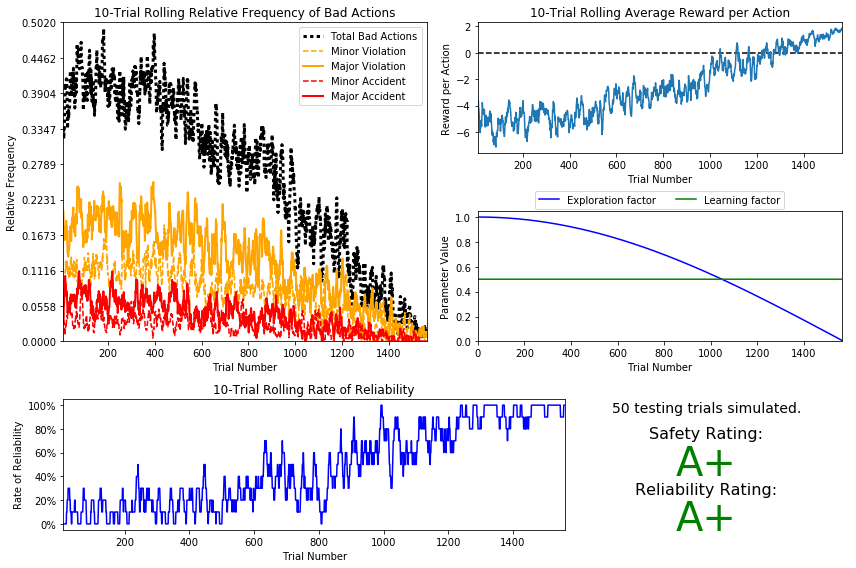

In [5]:
###### Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Q. What decaying function was used for epsilon (the exploration factor)?  
A.
$$ \epsilon = \cos(at), \textrm{for } 0 < a < 1 $$

Q. Approximately how many training trials were needed for your agent before begining testing?  
A. About 1500 times

Q. What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?  
* epsilon-tolerance is 0.001
  * To increase number of training trials and find non-violate action, I set epsilon-tolerance very low.
* alpha is 0.5
  * If alpha is high, I think that it can easily cause wrong decision in a rare state when a few non-violate but incorrect actions continue at the begging of the training.
  * If alpha is low, I think that it is difficult to repair accident action(big penalty action) incorrect value when such a state does not appear in the beggining and continues at the near end of training by chance.
  * I think 0.5 is moderate value.
  * I think these two points above are related exploration and exploitation dilemma. 

Q. How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?  
A. The frequency of bad action is cleary imporoved. The agent did not cause any accident and violation in the test. And, reliability could also improve, 90% testing trials could arrive to the destination in time.

Q. Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?  
A. Mainly yes. I think the agent could learn basic rule of traffic and could arrive to the destination almost in time.

Q. Are you satisfied with the safety and reliability ratings of the Smartcab?  
A. No. In this approach, the agent has to learn the correct action by a lot of trials for all state to take a correct action. If the agent can not find a global optima, the agent might cause accident. I think it seems not to be efficient and stable approach. Moreover, I wonder whether the agent truely never occurs accidents because we could not determine the bad action graphs are completely converged.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

A1.  

The optimal policy's concept is to protect traffic rules (the first precedence) and whether to close to the destination (the second precedence).  

| light | waypoint   | left vehicle's direction | right vehicle's direction | oncoming vehicle's direction | optimal policy's action |
|------ |------|------|------|------|------|
|   red  | left, forward| * | * | * | stop |
|   red  | right | none, left, right | * | * | right |
|   red  | right | forward | * | * | stop |
|   green  | forward| * | * | * | forward |
|   green  | right| * | *  | * | right |
|   green  | left | * | * | none, left | left |
|   green  | left | * | * | right, forward | right or forward |

\* can take any state.

* In this environment, at the green, the agent can not temporarily stop until oncoming vehicle go through and has to move anyway. Therefore, I think at the green light, in the case that waypoint is left and concoming vehicle's direction is right or forward, the agent has to move right or forward anyway.
* The table above shows right vehicle's direction does not affect traffic rules and does not affect safety.

A2. 

There are some non-optimal policies. They seems mainly to take non-viotation but incorrect actions.

A3. 
* Example1. light: red, waypoint: right, left vehicle's direction: forward
 * The Q-Learning policy takes stop action in each possible state. The other actions violate traffic rules(safety). Therefore, this shows this policy selects appropriate action in one case.
* Example2. light: green, weypoint: left, oncoming vehicle's direction: left
  * The Q-Learning policy takes left action. The other actions violate reliability. Therefore, this shows this policy selects appropriate action in one case.

A4. 
* Example1. light: green, waypoint: right
 * The Q-Learning policy takes forward action in one state. This action violates reliability.
 * The Q-Value of right(optimal action) is 0, and the Q-Value of forward is 0.55. And the other action values are 0. These values seem to be close and low.
 * I think the cause is that this state appeared very rarely, and droped in local optima(suboptimal policy). I think one of the solution is aggregatoin of the sates which means same. For example, in this case, right vehicle and oncoming vehicle directions does not matter. Therefore, I think these states can be aggregated and can be received appropriate rewards.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* about smartcab
  * The smartcab's inputs are light in front ofthe smartcab, other agent's direction surrouding intersection in front of the smartcab. That is to say, the smartcab can not collect remote intersections information (used to evaluate future rewards).
  
* about environment

 > Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards.
 
 * In this environment, the other agent's selection is only one at the intersection. Moreover, this environment is deterministic, and other agents always move only one direction at the intersection. Therefore, future rewards do not contribute a current reward.
 
* references
  * reviewer suggestions.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.